In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from teeplot import teeplot as tp
import numpy as np
import scipy.stats as stats

# get data

In [2]:
reg = pd.read_csv("356848/regulation.csv")
no_reg = pd.read_csv("356848/no-regulation.csv")

reg['regulation'] = "enabled"
no_reg['regulation'] = "disabled"

df = pd.concat([reg, no_reg])
df

,update,mean_fitness,min_fitness,max_fitness,inferiority,replicate,regulation
0,0,3.195,0,7,0.456429,10,enabled
1,1,4.838,3,7,0.691143,10,enabled
2,2,5.201,2,8,0.650125,10,enabled
3,3,5.673,3,9,0.630333,10,enabled
4,4,5.958,2,9,0.662000,10,enabled
...,...,...,...,...,...,...,...
31468,279,12.820,2,15,0.854667,9,disabled
31469,280,12.898,2,15,0.859867,9,disabled
31470,281,12.921,3,15,0.861400,9,disabled
31471,282,13.237,3,15,0.882467,9,disabled


# define teeplot functions

In [3]:
def logx_lineplot(*args, **kwargs):
    g = sns.lineplot(
        *args,
        **kwargs
    )
    g.set_xscale("log")
    plt.axhline(256, c="grey", linestyle="dotted", zorder=-1)
    y = np.array([16*i for i in range(17)])
    plt.yticks(y)
    # todo: change names here

# fitness over time

## process data

In [4]:

'''
new_rows = []
for (replicate, regulation), filtered in df.groupby(["replicate", "regulation"]):
    max_update = filtered["update"].max()

    for update in range(max_update, 10000):
        new_rows.append({
            "update": update,
            "max_fitness": 16,
            "replicate": replicate,
            "regulation": regulation
})

df = df.append(new_rows)
df
'''

'\nnew_rows = []\nfor (replicate, regulation), filtered in df.groupby(["replicate", "regulation"]):\n    max_update = filtered["update"].max()\n\n    for update in range(max_update, 10000):\n        new_rows.append({\n            "update": update,\n            "max_fitness": 16,\n            "replicate": replicate,\n            "regulation": regulation\n})\n\ndf = df.append(new_rows)\ndf\n'

## graph results (ci: SD)

teeplots/ci=sd+hue=regulation+viz=logx-lineplot+x=update+y=max-fitness+ext=.pdf
teeplots/ci=sd+hue=regulation+viz=logx-lineplot+x=update+y=max-fitness+ext=.png


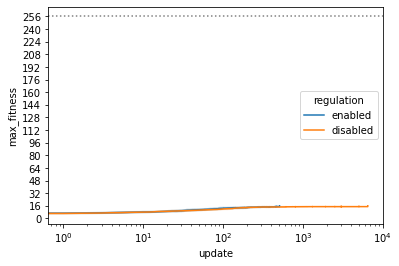

In [5]:
tp.tee(
    logx_lineplot,
    data=df,
    x="update",
    y="max_fitness",
    ci="sd",
    hue="regulation"
)

## graph results (ci: 95%)

In [6]:
data = df[np.log2(df["update"]+1) % 1.0 < 0.0001]
len(data)

376

In [7]:
'''
tp.tee(
    logx_lineplot,
    data=df,
    x="update",
    y="max_fitness",
    hue="regulation"
)
'''

'\ntp.tee(\n    logx_lineplot,\n    data=df,\n    x="update",\n    y="max_fitness",\n    hue="regulation"\n)\n'

# time to solution over number of states (k)

### process data

In [8]:
x = (df["max_fitness"] != df["max_fitness"].shift()).cumsum()
for a, b in zip(x, df["max_fitness"]):
    print(a, b)

1 7
1 7
2 8
3 9
3 9
3 9
3 9
3 9
4 10
4 10
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
5 11
6 12
6 12
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
7 13
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 15
8 1

81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
81 13
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 14
82 1

119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
119 10
120 11
120 11
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
121 12
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13
122 13

159 9
159 9
159 9
159 9
159 9
159 9
159 9
159 9
159 9
159 9
160 10
160 10
160 10
160 10
160 10
160 10
160 10
160 10
160 10
160 10
160 10
161 11
161 11
161 11
161 11
161 11
161 11
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
162 12
163 13
163 13
163 13
163 13
163 13
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
164 14
16

205 12
205 12
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
206 13
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
207 14
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
208 15
209 16
210 7
210 7
210 7
210 7
210 7
210 7
211 8
211 8
211 8
211 8
212 9
212 9
212 9
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 10
213 1

249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15
249 15

260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15
260 15

268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
268 13
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14
269 14

279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14
279 14

291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15
291 15

309 13
309 13
309 13
309 13
309 13
309 13
309 13
309 13
309 13
309 13
310 14
310 14
310 14
310 14
310 14
310 14
310 14
310 14
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15
311 15

332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15

332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15
332 15

341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15
341 15

352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15

352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15
352 15

358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
358 10
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
359 11
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12
360 12

383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15

383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15

383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15
383 15

398 9
398 9
398 9
398 9
398 9
398 9
398 9
398 9
398 9
398 9
398 9
398 9
398 9
398 9
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
399 10
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
400 11
401 12
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
402 13
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14
403 14

In [9]:
df = df.sort_values(by=["replicate", "regulation", "update"])

df["streak_length"] = df.groupby(
    (df["max_fitness"] != df["max_fitness"].shift()).cumsum()
).cumcount() + 1

<AxesSubplot:>

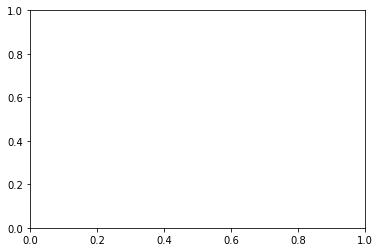

In [10]:
sns.lineplot(
    data=df[(df["replicate"] == 7) & (df["regulation"] == 1)],
    y="streak_length",
    x="update",
    ci=None,
    hue="max_fitness"
)

In [11]:
box_df = df[(df["max_fitness"] == 16)]

res_df = []
for (replicate, regulation), filtered in box_df.groupby(["replicate", "regulation"]):
    sol_time = filtered["update"].min()
    print(replicate, sol_time, "reg:", regulation)
    res_df.append({
        "solution_time": sol_time,
        "replicate": replicate,
        "regulation": regulation
    })

all_pairs = {item for item, filtered in df.groupby(["replicate", "regulation"])}
sol_pairs = {item for item, filtered in box_df.groupby(["replicate", "regulation"])}

for (replicate, regulation) in all_pairs - sol_pairs:
    sol_time = 10000
    print(replicate, sol_time, "reg:", regulation)
    res_df.append({
        "solution_time": sol_time,
        "replicate": replicate,
        "regulation": regulation
    })

res_df = df.from_records(res_df)

1 405 reg: disabled
1 370 reg: enabled
2 2506 reg: disabled
2 381 reg: enabled
3 5028 reg: disabled
3 92 reg: enabled
4 803 reg: disabled
4 452 reg: enabled
5 347 reg: disabled
5 509 reg: enabled
6 6494 reg: disabled
6 102 reg: enabled
7 358 reg: disabled
7 313 reg: enabled
8 411 reg: disabled
8 174 reg: enabled
9 283 reg: disabled
9 185 reg: enabled
10 273 reg: disabled
10 470 reg: enabled
11 360 reg: disabled
11 171 reg: enabled
12 245 reg: disabled
12 470 reg: enabled
13 1918 reg: disabled
13 279 reg: enabled
14 3045 reg: disabled
14 227 reg: enabled
15 1314 reg: disabled
15 144 reg: enabled
16 613 reg: disabled
16 332 reg: enabled
17 3017 reg: disabled
17 457 reg: enabled
18 324 reg: disabled
18 186 reg: enabled
19 734 reg: disabled
19 471 reg: enabled
20 2975 reg: disabled
20 348 reg: enabled


### graph

teeplots/viz=boxplot+x=regulation+y=solution-time+ext=.pdf
teeplots/viz=boxplot+x=regulation+y=solution-time+ext=.png


<AxesSubplot:xlabel='regulation', ylabel='solution_time'>

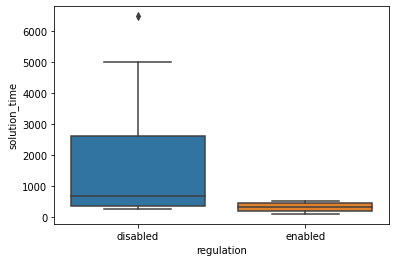

In [12]:
tp.tee(
    sns.boxplot,
    data=res_df,
    y="solution_time",
    x="regulation"
)

## time to solution (swarm plot)

In [13]:
def tee_swarmplot(*args, **kwargs):
    sns.swarmplot(
        linewidth=0.5,
        s=4,
        edgecolor='white',
        *args,
        **kwargs
    )
    sns.boxplot(
        *args,
        **kwargs
    )

teeplots/viz=tee-swarmplot+x=regulation+y=solution-time+ext=.pdf
teeplots/viz=tee-swarmplot+x=regulation+y=solution-time+ext=.png


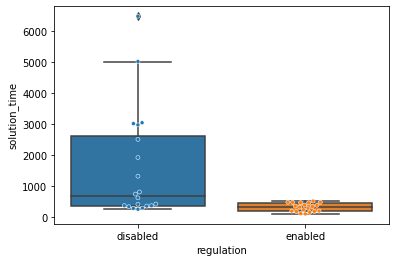

In [14]:
tp.tee(
    tee_swarmplot,
    data=res_df,
    y="solution_time",
    x="regulation"
)

In [15]:
def tee_barswarm(*args, **kwargs):
    sns.swarmplot(
        linewidth=0.5,
        s=4,
        edgecolor='white',
        *args,
        **kwargs
    )
    sns.barplot(
        capsize=0.4,
        errwidth=2,
        *args,
        **kwargs
    )

teeplots/viz=tee-barswarm+x=regulation+y=solution-time+ext=.pdf
teeplots/viz=tee-barswarm+x=regulation+y=solution-time+ext=.png


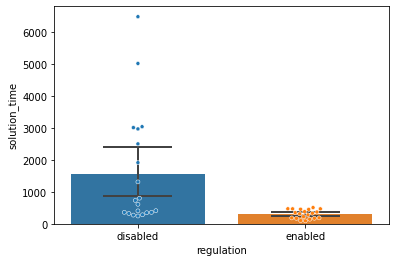

In [16]:
tp.tee(
    tee_barswarm,
    data=res_df,
    y="solution_time",
    x="regulation"
)